<a href="https://colab.research.google.com/github/mpaulina24/Paulina/blob/main/Tutorial_Neurokit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Tutorial: Análisis de señales ECG con NeuroKit2</center></font></h1>
<h3><font color='black'>

    María Paulina Arias Castillo - C.C. 1193085377
   
    Andrea Carolina Espinosa Villadiego - C.C. 1003399277


**NeuroKit2** es un paquete que brinda un acceso sencillo a rutinas avanzadas de procesamiento de bioseñales. Los investigadores y médicos sin amplios conocimientos de programación o procesamiento de señales biomédicas pueden analizar datos fisiológicos con solo dos líneas de código [1].

Sus **aplicaciones** son variadas y abarcan desde el análisis de señales como ECG, EEG, EMG, respiración y actividad electrodérmica, hasta la extracción automática de métricas fisiológicas como la frecuencia cardíaca, la variabilidad del ritmo cardíaco (HRV) o la amplitud de ondas en EEG. Además, permite preprocesar señales eliminando artefactos, normalizarlas, y generar reportes visuales y estadísticas que resumen los datos fisiológicos analizados.

La principal **ventaja** de usar NeuroKit2 frente a programar estas rutinas desde cero es la simplicidad y la rapidez. Donde implementar algoritmos avanzados para tareas como el filtrado de señales o la detección de picos podría llevar días o semanas, NeuroKit2 lo realiza en un par de líneas de código. Además, los métodos que utiliza han sido validados científicamente, garantizando resultados confiables sin necesidad de diseñar y validar cada paso por cuenta propia.

Otra ventaja clave es el acceso a técnicas avanzadas sin necesidad de ser un experto en procesamiento de señales. Por ejemplo, NeuroKit2 incluye herramientas para analizar variabilidad cardíaca o actividad cerebral que podrían ser complicadas de desarrollar manualmente. Su documentación clara y su integración con herramientas comunes de Python, como Pandas o Matplotlib, lo hacen aún más accesible, incluso para quienes tienen conocimientos limitados de programación.

Finalmente, el ahorro de recursos es significativo. NeuroKit2 permite a investigadores y profesionales centrarse en interpretar los resultados en lugar de invertir tiempo y esfuerzo en programar. Esto lo convierte en una herramienta ideal para médicos, investigadores y estudiantes que buscan soluciones rápidas y fiables en el análisis de bioseñales.

# **Instalación**

Para empezar a usar NeuroKit2, primero es necesario instalarla en tu entorno de Python. Esto se puede hacer fácilmente utilizando el gestor de paquetes pip. El comando básico para la instalación es:

In [ ]:
!pip install neurokit2

Una vez instalada, puedes comenzar a usarla importándola en tu código con:

In [ ]:
import neurokit2 as nk

A partir de aquí, NeuroKit2 ofrece una gran variedad de aplicaciones que se pueden realizar con tan solo unas pocas líneas de código. Estas aplicaciones incluyen el procesamiento de señales como ECG, EEG, respiración, EMG, entre otras, así como la extracción automática de métricas fisiológicas y la creación de visualizaciones.

Para ilustrar estas funcionalidades, a lo largo de este tutorial se desarrollarán diferentes ejemplos prácticos **enfocados en señales ECG** que te permitirán entender cómo utilizar NeuroKit2 de manera efectiva en tus propios proyectos. ¡Empecemos!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Simulación de señales ECG**

Si no se cuenta con una base de datos para trabajar, NeuroKit2 permite simular señales de ECG mediante el comando **nk.ecg_simulate()**. Este comando genera una señal electrocardiográfica sintética que se puede utilizar para análisis y aprendizaje.

La función tiene varios argumentos personalizables, entre ellos:

* duration: Especifica la duración de la señal en segundos. Por defecto, genera una señal de 10 segundos.
* sampling_rate: Define la frecuencia de muestreo en Hz (muestras por segundo). El valor por defecto es 1000 Hz, ideal para señales ECG detalladas.
* heart_rate: Permite definir la frecuencia cardíaca en latidos por minuto (BPM). Por defecto, genera un ECG con una frecuencia cardíaca normal (~70 BPM).
* method: Indica el modelo que se usará para simular la señal. El valor predeterminado es 'ecgsyn', basado en un modelo fisiológico bien conocido. También puede ser "simple"para una simulación basada en wavelets de Daubechies que se aproxima aproximadamente a un solo ciclo cardíaco.
* noise: Amplitud del ruido de Laplace.

Al ejecutar esta función, se genera una señal ECG sintética como un array de datos que puede ser visualizado o procesado directamente. Por ejemplo:

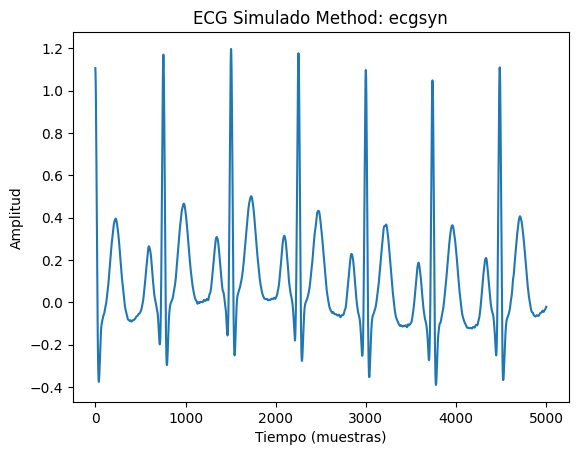

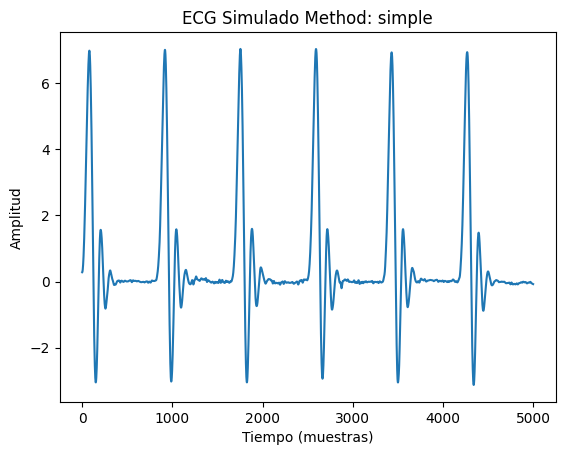

In [ ]:
import matplotlib.pyplot as plt

# Simular una señal ECG method = 'ecgsyn'
ecg_signal_ecgsyn = nk.ecg_simulate(duration=5, sampling_rate=1000, heart_rate=80)
# Simular una señal ECG method = 'simple'
ecg_signal_simple = nk.ecg_simulate(duration=5, sampling_rate=1000, heart_rate=80, method="simple")


# Visualizar la señal generada
plt.plot(ecg_signal_ecgsyn)
plt.title("ECG Simulado Method: ecgsyn")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.show()

plt.plot(ecg_signal_simple)
plt.title("ECG Simulado Method: simple")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.show()

La función genera una señal ECG que simula las características típicas de un electrocardiograma humano. Se observa la forma clásica con ondas P, QRS y T claramente definidas, lo que permite utilizarla en análisis como la detección de picos R, cálculo de frecuencia cardíaca o análisis de la variabilidad del ritmo cardíaco.

En esta misma función, si se emplea **method="multileads"**, se devolverá un **DataFrame que contiene 12 derivaciones**:

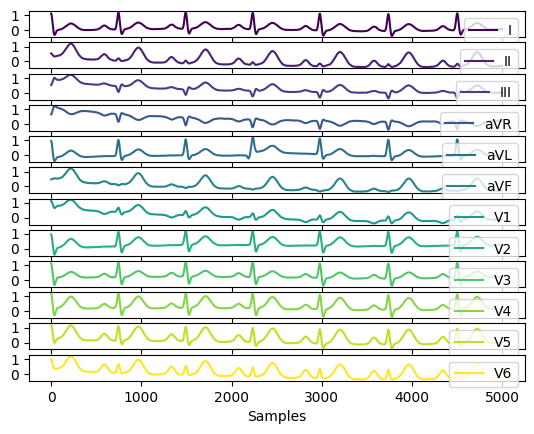

In [ ]:
ecg_signal_multileads = nk.ecg_simulate(duration=5, sampling_rate=1000, heart_rate=80, method="multileads")

nk.signal_plot(ecg_signal_multileads, subplots=True)

# **Preprocesamiento de la Señal ECG**

El preprocesamiento de señales ECG es un paso crucial para eliminar el ruido y mejorar la calidad de los análisis posteriores, como la detección de picos R o el cálculo de la frecuencia cardíaca. En NeuroKit2, la función **nk.ecg_clean()** permite limpiar señales ECG utilizando diferentes métodos predefinidos que aplican técnicas avanzadas de filtrado y procesamiento.

La función toma como entrada una señal de ECG y aplica un conjunto de filtros para eliminar ruido de baja frecuencia, interferencias de la línea eléctrica y otros artefactos. También permite elegir entre distintos métodos de limpieza, cada uno optimizado para situaciones específicas. El método predeterminado (neurokit) utiliza un filtro Butterworth de paso alto y es adecuado para la mayoría de los casos.

Parámetros principales:
* ecg_signal: La señal ECG sin procesar. Puede ser una lista, un array de NumPy o una serie de Pandas.
* sampling_rate: La frecuencia de muestreo de la señal (Hz). Por defecto, es 1000 Hz.
* method: El método de limpieza a utilizar, algunos son:

    * neurokit (por defecto): Filtro Butterworth + filtrado de línea eléctrica.

    * biosppy: Filtro FIR adecuado para señales con menor frecuencia de muestreo.

    * pantompkins1985, hamilton2002, elgendi2010: Métodos basados en algoritmos clásicos de investigación.

    * engzeemod2012, vg: Métodos avanzados para detección en señales más complejas.

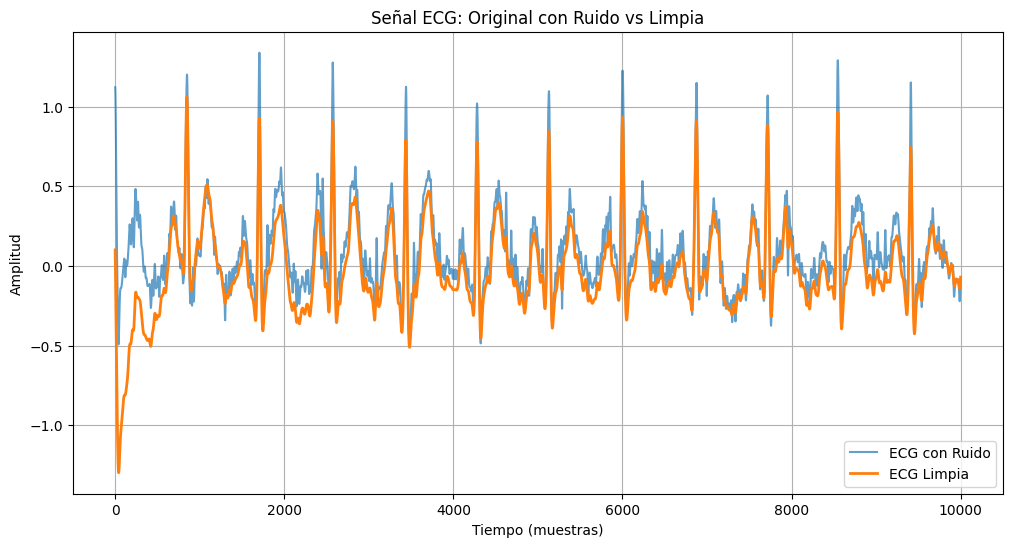

In [ ]:
# Simular una señal ECG con ruido
ecg_noisy = nk.ecg_simulate(duration=10, sampling_rate=1000, noise=0.2)

# Limpiar la señal utilizando el método predeterminado
ecg_cleaned = nk.ecg_clean(ecg_noisy, sampling_rate=1000, method='neurokit')

# Visualizar la señal original con ruido y la limpia
plt.figure(figsize=(12, 6))

# Graficar la señal ruidosa
plt.plot(ecg_noisy, label="ECG con Ruido", alpha=0.7)

# Graficar la señal limpia
plt.plot(ecg_cleaned, label="ECG Limpia", linewidth=2)

# Añadir títulos y leyendas
plt.title("Señal ECG: Original con Ruido vs Limpia")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **Características de señales ECG**

## Preprocesamiento automático y características

Una de sus funciones clave es **ecg_process()**, una función todo-en-uno que realiza el preprocesamiento completo de una señal ECG. Esta función incluye la limpieza de la señal (usando ecg_clean()), la detección de picos R (usando ecg_peaks()), el cálculo de la frecuencia cardíaca (usando signal_rate()), la evaluación de la calidad de la señal (usando ecg_quality()), la delineación de complejos QRS (usando ecg_delineate()) y la identificación de fases cardíacas (usando ecg_phase()). Con este enfoque integral, NeuroKit2 acelera y simplifica el análisis de señales ECG, ideal tanto para principiantes como para investigadores avanzados.

Salidas:
* signals: DataFrame de Pandas que contiene las diferentes señales procesadas relacionadas con el ECG. Cada columna del DataFrame representa un componente específico del análisis de la señal ECG, como los valores preprocesados, las fases cardíacas y la frecuencia cardíaca.
* info: Diccionario que contiene información resumida y detalles adicionales sobre el procesamiento de la señal ECG:


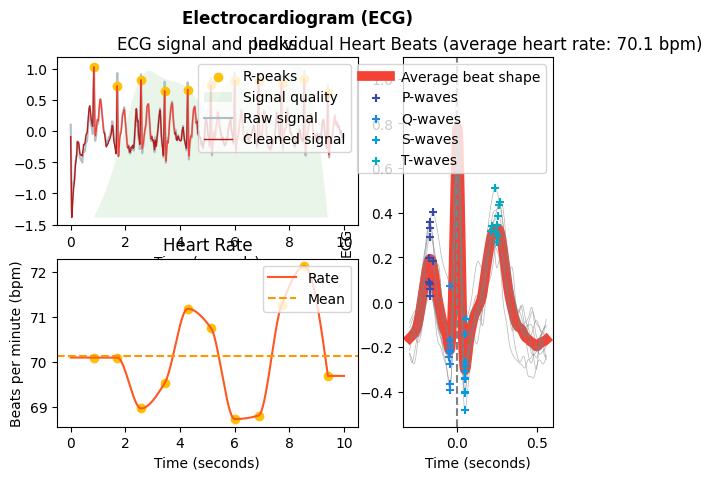

In [ ]:
# Process the ECG signal
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=1000)

# Visualize
nk.ecg_plot(signals, info)

Con los datos generados por nk.ecg_process, los picos R detectados y sus amplitudes están disponibles en el diccionario de info

In [ ]:
info_df = pd.DataFrame(list(info.items()), columns=['Metric', 'Value'])
info_df

,Metric,Value
0,method_peaks,neurokit
1,method_fixpeaks,None
2,ECG_R_Peaks,"[848, 1704, 2574, 3437, 4280, 5128, 6001, 6873..."
3,ECG_R_Peaks_Uncorrected,"[848, 1704, 2574, 3437, 4280, 5128, 6001, 6873..."
4,ECG_fixpeaks_ectopic,[]
5,ECG_fixpeaks_missed,[]
6,ECG_fixpeaks_extra,[]
7,ECG_fixpeaks_longshort,[]
8,ECG_fixpeaks_method,kubios
9,ECG_fixpeaks_rr,"[0.8560000000000001, 0.856, 0.87, 0.863, 0.843..."


Un ejemplo de su utilidad es que se puede realizar una sumatoria de las amplitudes de los picos R para estudiar si hay fluctuaciones significativas en la magnitud de los picos R, lo cual podría indicar variabilidad en la conducción eléctrica o la contracción cardíaca. Esto ayuda a conocer la "carga" total o intensidad general del ECG, ya que la amplitud de los picos R está relacionada con la magnitud de la despolarización ventricular.

Por otro lado, también se podría calcular la desviación estándar (DE) de las amplitudes de los picos R cuando se quiere analizar la variabilidad o consistencia de las amplitudes a lo largo del tiempo.

In [ ]:
r_peaks = sum(info["ECG_R_Peaks"])

# Calcula la desviación estándar
desviacion_estandar = np.std(info["ECG_R_Peaks"])

print(f"Sumatoria de amplitudes picos R: ",r_peaks)
print(f"Desviación estándar picos R: ",desviacion_estandar)

Sumatoria de amplitudes picos R:  56515
Desviación estándar picos R:  2707.738408572032




Una vez que la señal ECG ha sido procesada utilizando nk.ecg_process, se genera un DataFrame (signals) que contiene diversas características calculadas a partir de la señal original. Entre estas características, se encuentran columnas como ECG_Phase_Ventricular y ECG_Rate, que pueden ser utilizadas para obtener estadísticas útiles para el análisis clínico y científico.

In [ ]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,0.100885,-0.090870,70.093458,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,0.062348,-0.131677,70.093458,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.023592,-0.172514,70.093458,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.015562,-0.213409,70.093458,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.055251,-0.254385,70.093458,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.102910,-0.082698,69.686411,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
9996,-0.095018,-0.077814,69.686411,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
9997,-0.086825,-0.072752,69.686411,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
9998,-0.078454,-0.067571,69.686411,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


Promedio de la fase ventricular (ECG_Phase_Ventricular)
La columna ECG_Phase_Ventricular divide cada ciclo cardíaco en dos fases principales (sístole y diástole). Calcular su promedio nos permite analizar de manera cuantitativa el comportamiento promedio de la fase cardíaca, lo cual puede ser útil para evaluar la duración relativa de estas fases en un registro completo.

Así mismo, la columna ECG_Rate contiene la frecuencia cardíaca (en latidos por minuto, BPM) calculada en cada instante del registro, basada en los intervalos RR detectados. Calcular su promedio es fundamental para evaluar el ritmo cardíaco basal del sujeto durante el período de registro.

In [ ]:
print(f"Promedio fase ventricular: ",signals['ECG_Phase_Ventricular'].mean())
print(f"Frecuencia cardiaca promedio: ",signals['ECG_Rate'].mean())

Promedio fase ventricular:  0.4152264769004857
Frecuencia cardiaca promedio:  70.11918666651822


##  **Detección de picos R (ecg_peaks)**

Los picos R son fundamentales para analizar la frecuencia cardíaca y otras métricas. Utilizamos ecg_peaks() para detectarlos.
Los parámetros principales son:

* ecg_cleaned: La señal ECG ya preprocesada (limpia).
* method: Método de detección (neurokit predeterminado).
* sampling_rate: Frecuencia de muestreo de la señal.
* correct_artifacts: Corrige artefactos en los picos detectados (por defecto, False).

Outcomes:

* Info: Un diccionario con los índices de los picos R detectados.
* Signals: DataFrame con etiquetas binarias que indican la ubicación de los picos R en la señal.

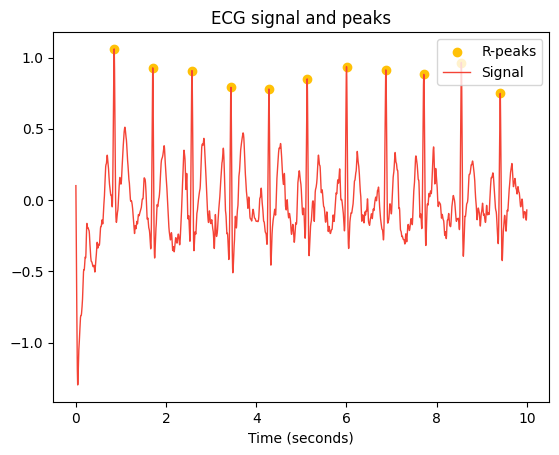

In [ ]:
signals, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000, correct_artifacts=True, show=True)

## **Frecuencia cardíaca (ecg_rate y signal_rate)**

### **signal_rate():** Calcula la frecuencia cardíaca u otras tasas (como la respiratoria), a partir de eventos detectados (como los picos R).

Parámetros principales:

* rpeaks: Índices de los picos R.
* sampling_rate: Frecuencia de muestreo.

Salida:

* rate1/rate2: arrays que representan la frecuencia cardíaca (en BPM) a lo largo del tiempo.

array([80.45052293, 80.45052293, 80.45052293, ..., 80.64516129,
       80.64516129, 80.64516129])

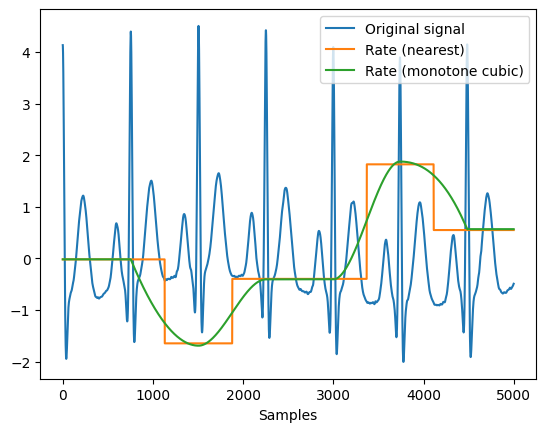

In [ ]:
rpeaks, info = nk.ecg_peaks(ecg_signal_ecgsyn, sampling_rate=1000)

# Compute rate using 2 methods
rate1 = nk.signal_rate(peaks=rpeaks,
                       desired_length=len(ecg_signal_ecgsyn),
                       interpolation_method="nearest")


rate2 = nk.signal_rate(peaks=rpeaks,
                       desired_length=len(ecg_signal_ecgsyn),
                       interpolation_method="monotone_cubic")


# Visualize signal and rate on the same scale
nk.signal_plot([ecg_signal_ecgsyn, rate1, rate2], labels = ["Original signal", "Rate (nearest)", "Rate (monotone cubic)"], standardize = True)

rate1

### **ecg_rate():** es una función simplificada para calcular la frecuencia cardíaca directamente desde los picos R detectados.

Parámetros principales:

* rpeaks: Índices de los picos R detectados.
* sampling_rate: Frecuencia de muestreo.

Salida:

Un array con la frecuencia cardíaca (en BPM) correspondiente a cada intervalo RR.

In [ ]:
# Calcular la frecuencia cardíaca
heart_rate = nk.ecg_rate(ecg_signal_ecgsyn)

# Mostrar la frecuencia cardíaca
heart_rate

array([-2.66113175e+08, -1.19482058e+07, -5.09106483e+06, ...,
        5.06942621e+07,  5.05189308e+07,  5.08455680e+07])

## **Identificación de fases cardíacas (ecg_phase)**

Divide la actividad del corazón en fases: sístole y diástole, basándose en los picos R y la forma de la señal.

Parámetros principales:

* rpeaks: Posiciones de los picos R.
* sampling_rate: Frecuencia de muestreo.

Salida:

* cardiac_phase: Diccionario con las fases estimadas mostrando su ubicación en binario

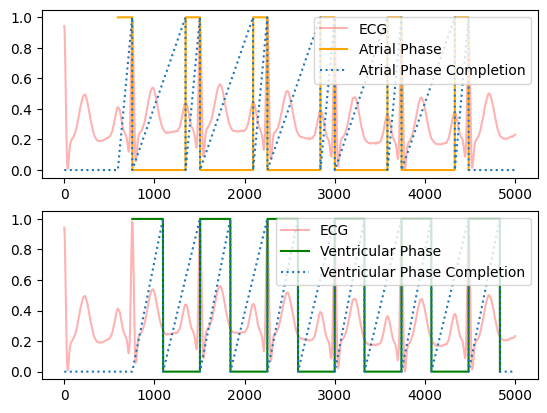

In [ ]:
_, rpeaks = nk.ecg_peaks(ecg_signal_ecgsyn)

signals, waves = nk.ecg_delineate(ecg_signal_ecgsyn, rpeaks, sampling_rate=1000)

cardiac_phase = nk.ecg_phase(ecg_cleaned=ecg_signal_ecgsyn, rpeaks=rpeaks,
                             delineate_info=waves, sampling_rate=1000)


_, ax = plt.subplots(nrows=2)

ax[0].plot(nk.rescale(ecg_signal_ecgsyn), label="ECG", color="red", alpha=0.3)
ax[0].plot(cardiac_phase["ECG_Phase_Atrial"], label="Atrial Phase", color="orange")
ax[0].plot(cardiac_phase["ECG_Phase_Completion_Atrial"], label="Atrial Phase Completion", linestyle="dotted")
ax[0].legend(loc="upper right")
ax[1].plot(nk.rescale(ecg_signal_ecgsyn), label="ECG", color="red", alpha=0.3)
ax[1].plot(cardiac_phase["ECG_Phase_Ventricular"], label="Ventricular Phase", color="green")
ax[1].plot(cardiac_phase["ECG_Phase_Completion_Ventricular"], label="Ventricular Phase Completion", linestyle="dotted")
ax[1].legend(loc="upper right")

## **Morfología del ECG (ecg_delineate)**

Permite identificar y delinear las diferentes ondas en el ECG: ondas P, complejo QRS y onda T. Es crucial para un análisis más detallado de la morfología de las señales ECG.

Parámetros principales:

* ecg_cleaned: La señal ECG limpia.
* rpeaks: Posiciones de los picos R, obtenidas con ecg_peaks.
* sampling_rate: Frecuencia de muestreo.
* method: Método para la delineación ('dwt' por transformada wavelet, 'cwt', etc.).

Salida:

Un diccionario con las ubicaciones de las ondas P, QRS y T


{'ECG_P_Peaks': [595, 1347, 2095, 2841, 3585, nan],
 'ECG_Q_Peaks': [715, 1466, 2214, 2961, 3700, nan],
 'ECG_S_Peaks': [795, 1545, 2292, 3038, 3777, nan],
 'ECG_T_Peaks': [982, 1729, 2473, 3225, 3960, nan],
 'ECG_P_Onsets': [542, 1285, 2044, 2784, 3514, nan],
 'ECG_T_Offsets': [1064, 1828, 2568, 3328, 4069, nan]}

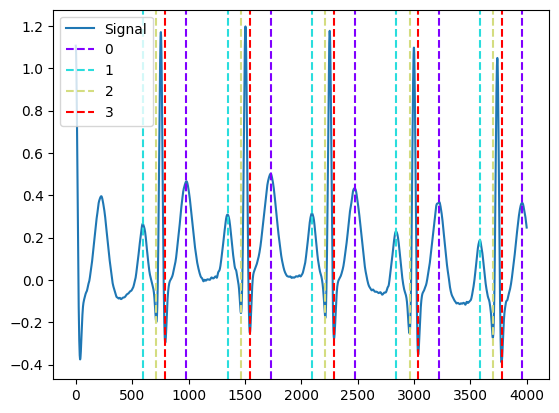

In [ ]:
# ECG data
ecg_signal = nk.data(dataset="ecg_1000hz")

_, rpeaks = nk.ecg_peaks(ecg_signal_ecgsyn, sampling_rate=1000) # Picos R

info, waves_peak = nk.ecg_delineate(ecg_signal_ecgsyn, rpeaks, sampling_rate=1000, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg_signal_ecgsyn[:4000])

waves_peak

## **Relación ECG-respiración (ecg_rsp)**

La frecuencia respiratoria puede derivarse del ECG mediante ecg_rsp(), que utiliza los picos R para generar una señal respiratoria. Los parámetros clave son:

* ecg_rate: La señal de frecuencia cardíaca (por ejemplo, obtenida con ecg_rate()).
* sampling_rate: Frecuencia de muestreo (por defecto, 1000 Hz).
* method: Método utilizado para derivar la respiración:
    * vangent2019 (predeterminado): Filtro de 0.1 - 0.4 Hz.
    * soni2019: Filtro 0 - 0.5 Hz.
    * charlton2016: Filtro 0.066 - 1 Hz.
    * sarkar2015: Filtro 0.1 - 0.7 Hz.

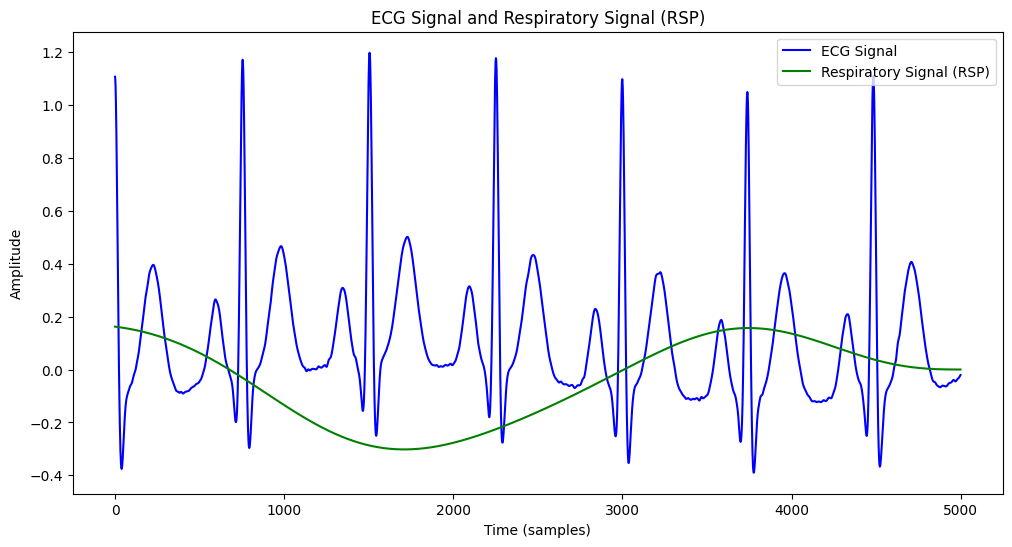

In [ ]:
rpeaks, info = nk.ecg_peaks(ecg_signal_ecgsyn, sampling_rate=1000)

ecg_rate = nk.signal_rate(rpeaks, sampling_rate=1000, desired_length=len(rpeaks))

# Get ECG Derived Respiration (EDR) and add to the data
rsp_signal = nk.ecg_rsp(ecg_rate, sampling_rate=1000)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Plotear la señal de ECG
plt.plot(ecg_signal_ecgsyn, label="ECG Signal", color='b')

# Plotear la señal de respiración (RSP)
plt.plot(rsp_signal, label="Respiratory Signal (RSP)", color='g')

# Agregar título y etiquetas
plt.title("ECG Signal and Respiratory Signal (RSP)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()

# Mostrar el gráfico
plt.show()


## **Variabilidad de la frecuencia cardíaca (HRV) (nk.hrv_time)**

Calcula métricas de HRV (Heart Rate Variability) en el dominio del tiempo, que son indicadores importantes del estado de salud cardiovascular y del sistema nervioso autónomo.

Parámetros principales:

* rpeaks: Posiciones de los picos R detectados.
* sampling_rate: Frecuencia de muestreo.

Salida:

Un DataFrame con métricas como HRV_MeanNN, SDNN, RMSSD, pNN50, entre otras.

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,69.639535,6.213589,NaN,NaN,NaN,NaN,NaN,NaN,6.969798,6.977911,...,6.0,0.891502,66.0,74.0,0.465116,1.395349,47.0,142.0,1.733871,23.4375


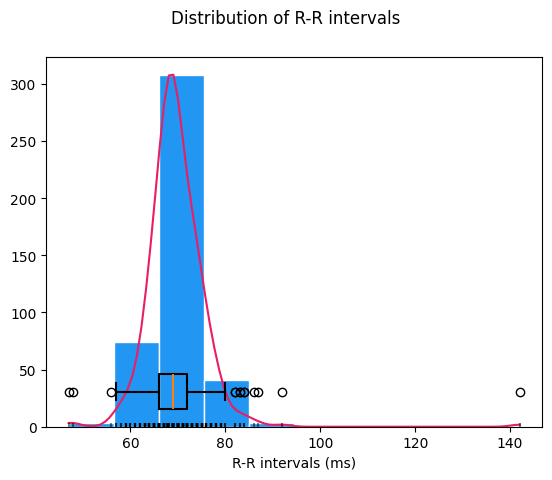

In [ ]:
data = nk.data("bio_resting_5min_100hz")
data.head()

# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)
hrv_time = nk.hrv_time(peaks, sampling_rate=1000, show=True)
hrv_time

## **Segmentación (ecg_segment)**

Permite dividir la señal ECG en segmentos basados en eventos específicos, como los picos R o cualquier otro marcador temporal. Esto es útil para análisis enfocados en períodos específicos de tiempo.

Parámetros principales:

* ecg_cleaned: La señal ECG limpia.
* rpeaks: Posiciones de los picos R.
* sampling_rate: Frecuencia de muestreo.

Salida:

Una lista de segmentos de señal, cada uno correspondiente a un evento definido.

Número de latidos de la señal ECG:  11


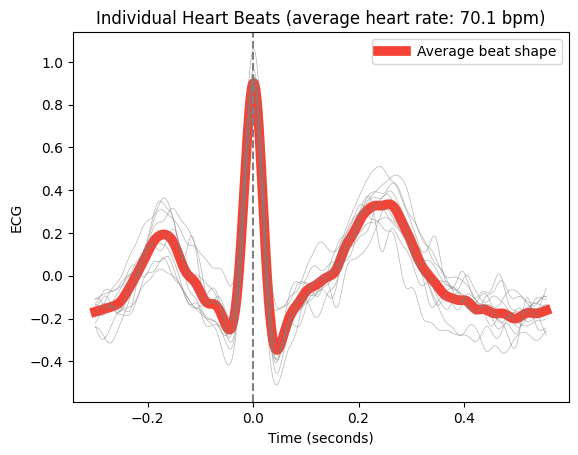

In [ ]:
qrs_epochs = nk.ecg_segment(ecg_cleaned, rpeaks=None, sampling_rate=1000, show=True)

# Como se obtiene una lista con los segmentos de la señal, es posible calcular el número de latidos a partir de su tamaño:

print(f"Número de latidos de la señal ECG: ", len(qrs_epochs))

# **Referencias**

[1] Makowski, D., Pham, T., Lau, ZJ, Brammer, JC, Lespinasse, F., Pham, H., Schölzel, C. y Chen, SA (2021). NeuroKit2: una caja de herramientas de Python para el procesamiento de señales neurofisiológicas. Behavior Research Methods , 53(4), 1689-1696. https://doi.org/10.3758/s13428-020-01516-y